# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('02_Data_cleaned_Client1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83235 entries, 0 to 83234
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EventName           83235 non-null  object 
 1   StartDate           83235 non-null  object 
 2   EventType           83234 non-null  object 
 3   BookingReference    83235 non-null  object 
 4   AttendeeReference   83235 non-null  object 
 5   GroupSize           83235 non-null  int64  
 6   IsLeadAttendee      83235 non-null  bool   
 7   AttendeeGrossCost   83235 non-null  float64
 8   EventId             83235 non-null  int64  
 9   BookingStatus       83235 non-null  object 
 10  AttendeeType        83235 non-null  object 
 11  TicketType          83235 non-null  object 
 12  StatusCreatedDate   83235 non-null  object 
 13  ClientId            83235 non-null  int64  
 14  StartYear           83235 non-null  int64  
 15  StartMonth          83235 non-null  int64  
 16  Stat

In [5]:
data.head(10)

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,StartYear,StartMonth,StatusCreatedYear,StatusCreatedMonth,Season
0,Test event (AT),08/02/2021 10:00,NaN,B998840,A1067111,1,True,0.0,24563,Attending,Attendee,Standard,30/07/2021 14:33,219,2021,2,2021,7,Winter
1,The Bibliographical Society Gold Medal,16/11/2021 17:30,Lecture,B1032227,A1100839,1,True,0.0,25265,Attending,In-person,In-person,15/11/2021 20:21,219,2021,11,2021,11,Autumn
2,CANCELLED LRBS: Blocks and Plates - Towards a ...,27/06/2022 09:00,Summer School,B1039156,A1107918,1,True,680.0,25329,Attending,Standard,Standard,08/12/2021 09:40,219,2022,6,2021,12,Summer
3,IALS Introduction to Research Methods for Law ...,01/10/2022 10:00,Research Training,B1040720,A1109488,1,True,575.0,25181,Attending,Attendee,Standard (£575.00),16/12/2021 12:02,219,2022,10,2021,12,Autumn
4,False Maps: Latin America. little magazines an...,24/02/2022 18:00,Seminar,B1054082,A1122872,1,True,0.0,24940,Attending,Attendee,Standard,26/01/2022 10:36,219,2022,2,2022,1,Winter
5,From Devilry to Divinity: Readings in Dante's ...,28/02/2022 18:30,Other Events,B1057045,A1125844,1,True,0.0,25435,Attending,Whole Programme,Whole Programme,01/02/2022 21:32,219,2022,2,2022,2,Winter
6,*CANCELLED* Education in Antiquity within the ...,03/02/2022 17:30,Seminar,B1060074,A1128892,1,True,0.0,25700,Attending,Attendee,Online Only,10/02/2022 13:42,219,2022,2,2022,2,Winter
7,LIPS: Liturgical and Devotional Manuscripts,15/06/2022 10:00,Summer School,B1061101,A1129921,1,True,270.0,25352,Attending,Standard,Standard,15/02/2022 14:35,219,2022,6,2022,2,Summer
8,POSTPONED: Tom Raworth and South America,24/03/2022 18:00,Seminar,B1070390,A1139873,1,True,0.0,24941,Attending,Attendee,Standard,17/03/2022 13:30,219,2022,3,2022,3,Spring
9,IALS Fellow's Lunchtime Seminar: How we tackle...,06/01/2022 12:00,Seminar,B1073598,A1144419,1,True,0.0,26029,Attending,Attendee,Standard,27/03/2022 06:07,219,2022,1,2022,3,Winter


In [6]:
data['StartDate'] = pd.to_datetime(data['StartDate'], infer_datetime_format=True)
data['StatusCreatedDate'] = pd.to_datetime(data['StatusCreatedDate'], infer_datetime_format=True)

In [7]:
# Creating Days to Event
data['Days to Event'] = (data['StartDate'] - data['StatusCreatedDate']).dt.days 

In [8]:
data.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,StartYear,StartMonth,StatusCreatedYear,StatusCreatedMonth,Season,Days to Event
0,Test event (AT),2021-08-02 10:00:00,NaN,B998840,A1067111,1,True,0.0,24563,Attending,Attendee,Standard,2021-07-30 14:33:00,219,2021,2,2021,7,Winter,2
1,The Bibliographical Society Gold Medal,2021-11-16 17:30:00,Lecture,B1032227,A1100839,1,True,0.0,25265,Attending,In-person,In-person,2021-11-15 20:21:00,219,2021,11,2021,11,Autumn,0
2,CANCELLED LRBS: Blocks and Plates - Towards a ...,2022-06-27 09:00:00,Summer School,B1039156,A1107918,1,True,680.0,25329,Attending,Standard,Standard,2021-12-08 09:40:00,219,2022,6,2021,12,Summer,200
3,IALS Introduction to Research Methods for Law ...,2022-01-10 10:00:00,Research Training,B1040720,A1109488,1,True,575.0,25181,Attending,Attendee,Standard (£575.00),2021-12-16 12:02:00,219,2022,10,2021,12,Autumn,24
4,False Maps: Latin America. little magazines an...,2022-02-24 18:00:00,Seminar,B1054082,A1122872,1,True,0.0,24940,Attending,Attendee,Standard,2022-01-26 10:36:00,219,2022,2,2022,1,Winter,29


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83235 entries, 0 to 83234
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EventName           83235 non-null  object        
 1   StartDate           83235 non-null  datetime64[ns]
 2   EventType           83234 non-null  object        
 3   BookingReference    83235 non-null  object        
 4   AttendeeReference   83235 non-null  object        
 5   GroupSize           83235 non-null  int64         
 6   IsLeadAttendee      83235 non-null  bool          
 7   AttendeeGrossCost   83235 non-null  float64       
 8   EventId             83235 non-null  int64         
 9   BookingStatus       83235 non-null  object        
 10  AttendeeType        83235 non-null  object        
 11  TicketType          83235 non-null  object        
 12  StatusCreatedDate   83235 non-null  datetime64[ns]
 13  ClientId            83235 non-null  int64     

In [10]:
# Using drop() to delete row based with '#NUM!'

data.drop(data[data['Days to Event'] < 0].index, inplace=True)

In [11]:
# Creating weeks to Event
data['Weeks to Event'] = data['Days to Event'].div(7).round(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81937 entries, 0 to 83234
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EventName           81937 non-null  object        
 1   StartDate           81937 non-null  datetime64[ns]
 2   EventType           81936 non-null  object        
 3   BookingReference    81937 non-null  object        
 4   AttendeeReference   81937 non-null  object        
 5   GroupSize           81937 non-null  int64         
 6   IsLeadAttendee      81937 non-null  bool          
 7   AttendeeGrossCost   81937 non-null  float64       
 8   EventId             81937 non-null  int64         
 9   BookingStatus       81937 non-null  object        
 10  AttendeeType        81937 non-null  object        
 11  TicketType          81937 non-null  object        
 12  StatusCreatedDate   81937 non-null  datetime64[ns]
 13  ClientId            81937 non-null  int64     

In [13]:
data['Days to Event'].isnull().sum()

0

In [14]:
# Dropping rows with "Cancelled" in event name column
data.drop(data[~data["EventName"].str.contains('CANCELLED')==False].index, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80771 entries, 0 to 83234
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EventName           80771 non-null  object        
 1   StartDate           80771 non-null  datetime64[ns]
 2   EventType           80770 non-null  object        
 3   BookingReference    80771 non-null  object        
 4   AttendeeReference   80771 non-null  object        
 5   GroupSize           80771 non-null  int64         
 6   IsLeadAttendee      80771 non-null  bool          
 7   AttendeeGrossCost   80771 non-null  float64       
 8   EventId             80771 non-null  int64         
 9   BookingStatus       80771 non-null  object        
 10  AttendeeType        80771 non-null  object        
 11  TicketType          80771 non-null  object        
 12  StatusCreatedDate   80771 non-null  datetime64[ns]
 13  ClientId            80771 non-null  int64     

In [16]:
# Dropping rows with "Cancel;ed" in BookingStatus column
data.drop(data[data["BookingStatus"] == "Cancelled"].index, inplace= True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80675 entries, 0 to 83234
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EventName           80675 non-null  object        
 1   StartDate           80675 non-null  datetime64[ns]
 2   EventType           80674 non-null  object        
 3   BookingReference    80675 non-null  object        
 4   AttendeeReference   80675 non-null  object        
 5   GroupSize           80675 non-null  int64         
 6   IsLeadAttendee      80675 non-null  bool          
 7   AttendeeGrossCost   80675 non-null  float64       
 8   EventId             80675 non-null  int64         
 9   BookingStatus       80675 non-null  object        
 10  AttendeeType        80675 non-null  object        
 11  TicketType          80675 non-null  object        
 12  StatusCreatedDate   80675 non-null  datetime64[ns]
 13  ClientId            80675 non-null  int64     

## Thoughts

Hypothesis to say how people behave towards events start date from purchase
1. Behavior of purchase for each season or cycle ? DO people purchase further away to event strart date or closer to event start date. Use Days to event and weeks to event columns.
2. What season do people start purchasing lots of tickets towards event start date ? e.g for summer what is the average purchasing days to event and how long did it take to sell out ?
3. What is the start and end purchase dates to the start of the event and what was the bookings made ? Did advertisement start at that time or did word of moth from friends affect this 
4. Why are some events purchased more than other events ? What is the infulential factor. Is it SartDate and the season of the particular event ?
5. Sales for EVENTIID and season ?

## Question 1: What was the best month for sales ? How many tickets were sold

We can clearly see that month 3 (March) has the highest sales across all years with approximately 52677. But we need to visualize it to make our bussiness partner easier to understand.

In [18]:
data.groupby(['StatusCreatedMonth'], as_index=False)['GroupSize'].sum()

,StatusCreatedMonth,GroupSize
0,1,12473
1,2,6620
2,3,6819
3,4,5632
4,5,7819
5,6,4805
6,7,934
7,8,782
8,9,5516
9,10,15374


Visualize our results

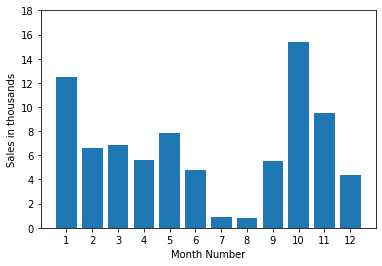

In [19]:

results = data.groupby(['StatusCreatedMonth'], as_index=False)['GroupSize'].sum()

plt.bar(results['StatusCreatedMonth'], results['GroupSize'])
plt.xticks(results['StatusCreatedMonth'])
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))   # Scaling in thousands
plt.ylabel('Sales in thousands')
plt.xlabel('Month Number')
plt.show()

## Question 2

### For all event types, what is the average days to event per season ?

In [20]:
data.groupby(['Season'], as_index=False).agg({'Days to Event':'mean'})

,Season,Days to Event
0,Autumn,17.124298
1,Spring,20.490145
2,Summer,21.589411
3,Winter,17.519461


Text(0.5, 1.0, 'Seasons for Weeks to Event')

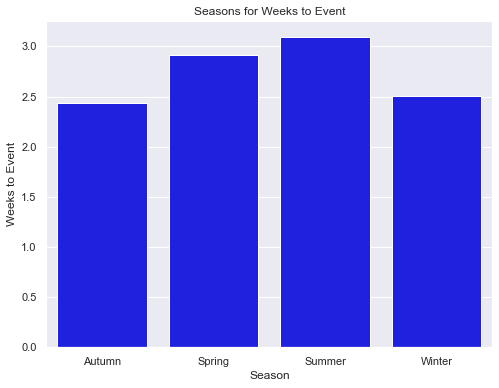

In [21]:
result21 = data.groupby(['Season'], as_index=False).agg({'Weeks to Event':'mean'})

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x = 'Season', y = 'Weeks to Event',data= result21, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Seasons for Weeks to Event')

### For all event types, what is the average weeks to event for bookings made per month ?

In [22]:
data.groupby(['StatusCreatedMonth'], as_index=False).agg({'Weeks to Event':'mean'})

,StatusCreatedMonth,Weeks to Event
0,1,2.892488
1,2,2.247885
2,3,2.064086
3,4,3.340554
4,5,2.206857
5,6,1.379188
6,7,4.098501
7,8,5.097187
8,9,4.865385
9,10,2.908287


Text(0.5, 1.0, 'Booking Months to Days to Event')

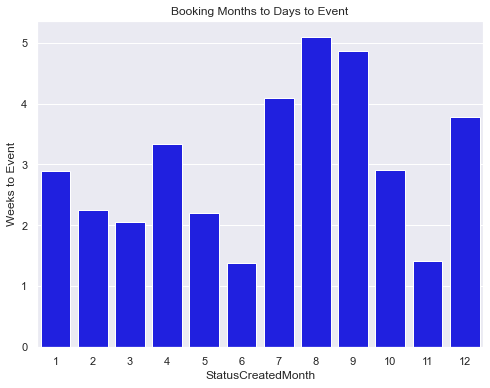

In [23]:
result22 = data.groupby(['StatusCreatedMonth'], as_index=False).agg({'Weeks to Event':'mean'})

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x = 'StatusCreatedMonth', y = 'Weeks to Event',data= result22, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Booking Months to Days to Event')

## For all event types (non seasonality) against weeks to event

### For all event types, what are the weeks to event for number of bookings made ?

In [24]:
data.groupby(['Weeks to Event'], as_index=False).agg({'BookingReference':'count'})

,Weeks to Event,BookingReference
0,0.0,21753
1,1.0,20328
2,2.0,9540
3,3.0,7115
4,4.0,5377
5,5.0,4193
6,6.0,2752
7,7.0,2313
8,8.0,1878
9,9.0,1702


Text(0.5, 1.0, 'Number of Bookings made per Weeks to Event')

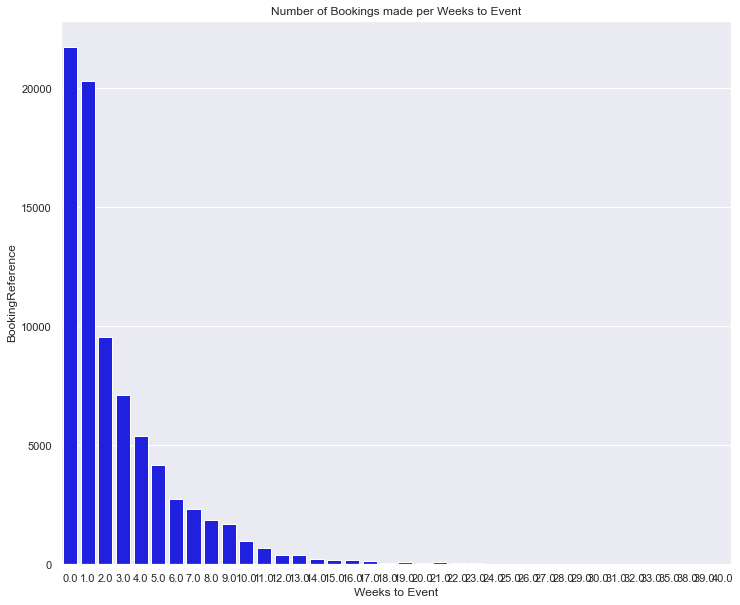

In [25]:
result2 = data.groupby(['Weeks to Event'], as_index=False).agg({'BookingReference':'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'BookingReference',data= result2, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Weeks to Event')

### For all event types, what are the weeks to event for total number of group size ?

In [26]:
data.groupby(['Weeks to Event'], as_index=False).agg({'GroupSize':'sum'})

,Weeks to Event,GroupSize
0,0.0,21753
1,1.0,20330
2,2.0,9542
3,3.0,7115
4,4.0,5377
5,5.0,4195
6,6.0,2752
7,7.0,2313
8,8.0,1878
9,9.0,1702


Text(0.5, 1.0, 'Total Number of Bookings made per Weeks to Event')

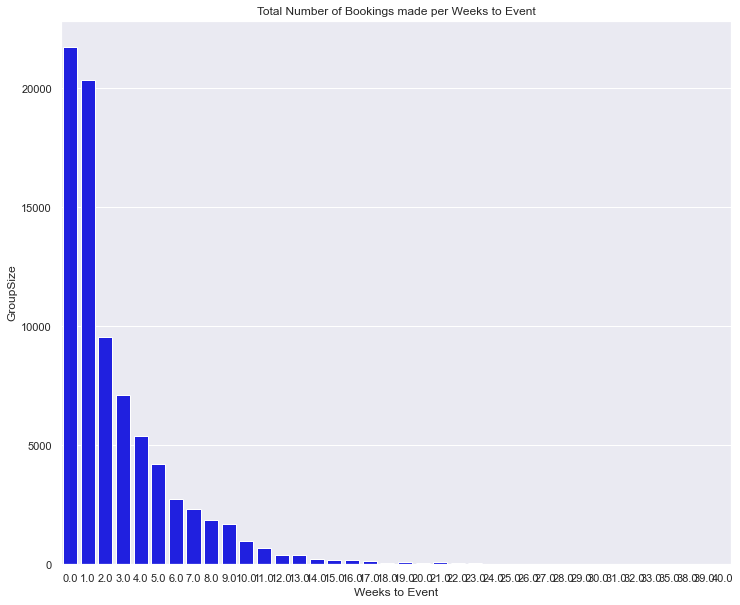

In [27]:
result23 = data.groupby(['Weeks to Event'], as_index=False).agg({'GroupSize':'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'GroupSize',data= result23, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Total Number of Bookings made per Weeks to Event')

## For all event types (season) against weeks to event

### For all event types and seasons, what are the weeks to event per booking reference per season ?


# Winter

### For BookingReference, what are the weeks to event for the number of bookings per season ?

In [28]:
data.loc[data['Season'] == 'Winter'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

# data.groupby(['StatusCreatedMonth'], as_index=False).agg({'Days to Event':'mean'})

,Weeks to Event,BookingReference
0,0.0,5694
1,1.0,5244
2,2.0,2256
3,3.0,1692
4,4.0,1090
5,5.0,890
6,6.0,694
7,7.0,431
8,8.0,466
9,9.0,346


Text(0.5, 1.0, 'Number of Bookings made per Weeks to Event')

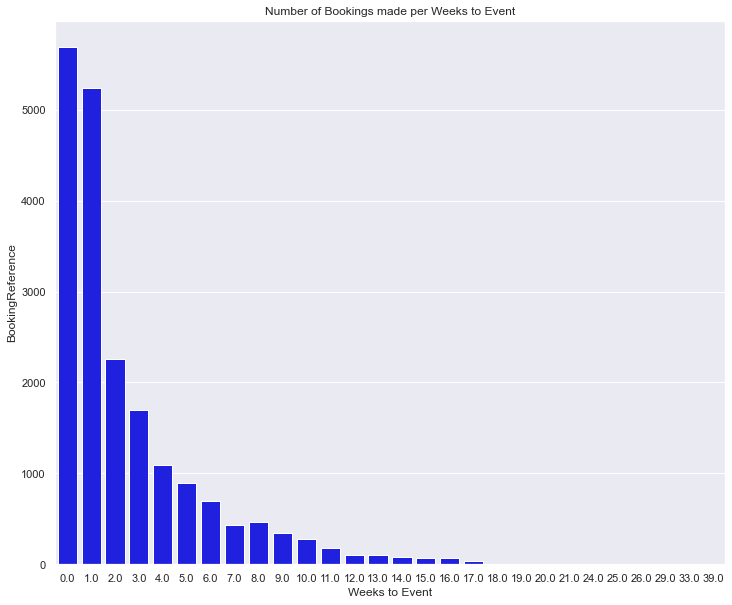

In [29]:
result24 = data.loc[data['Season'] == 'Winter'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'BookingReference',data= result24, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Weeks to Event')

### For GroupSize, what are the weeks to event for all total number of bookings per season ?

In [30]:
data.loc[data['Season'] == 'Winter'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

,Weeks to Event,GroupSize
0,0.0,5694
1,1.0,5244
2,2.0,2256
3,3.0,1692
4,4.0,1090
5,5.0,890
6,6.0,694
7,7.0,431
8,8.0,466
9,9.0,346


Text(0.5, 1.0, 'Total Number of Bookings made per Weeks to Event')

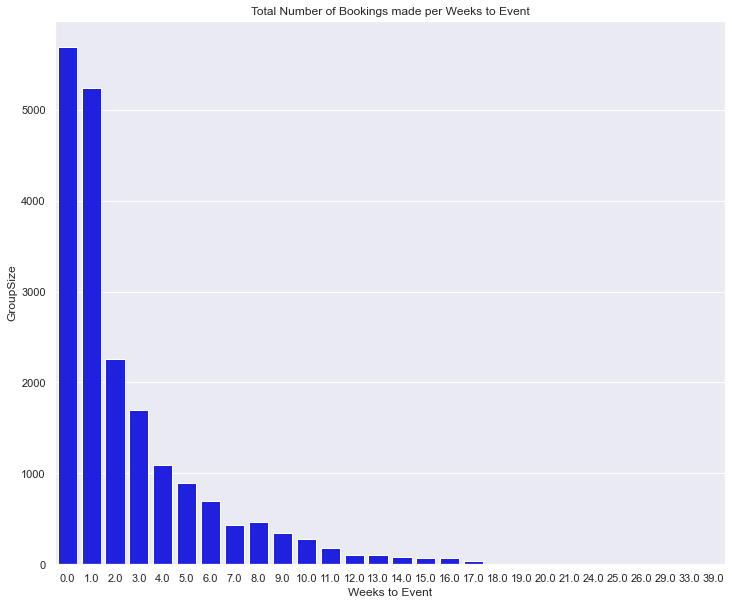

In [31]:
result25 = data.loc[data['Season'] == 'Winter'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'GroupSize',data= result25, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Total Number of Bookings made per Weeks to Event')

# Summer

### For BookingReference, what are the weeks to event for the number of bookings per season ?

In [32]:
data.loc[data['Season'] == 'Summer'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

,Weeks to Event,BookingReference
0,0.0,3365
1,1.0,3543
2,2.0,1561
3,3.0,1238
4,4.0,896
5,5.0,1047
6,6.0,534
7,7.0,486
8,8.0,410
9,9.0,548


Text(0.5, 1.0, 'Number of Bookings made per Weeks to Event')

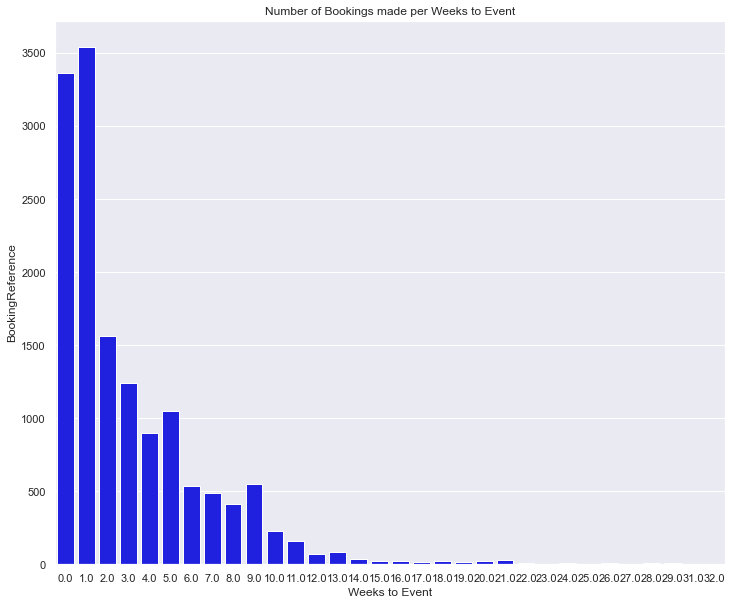

In [33]:
result26 = data.loc[data['Season'] == 'Summer'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'BookingReference',data= result26, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Weeks to Event')

### For GroupSize, what are the weeks to event for all total number of bookings per season ?

In [34]:
data.loc[data['Season'] == 'Summer'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

,Weeks to Event,GroupSize
0,0.0,3365
1,1.0,3543
2,2.0,1561
3,3.0,1238
4,4.0,896
5,5.0,1047
6,6.0,534
7,7.0,486
8,8.0,410
9,9.0,548


Text(0.5, 1.0, 'Total Number of Bookings made per Weeks to Event')

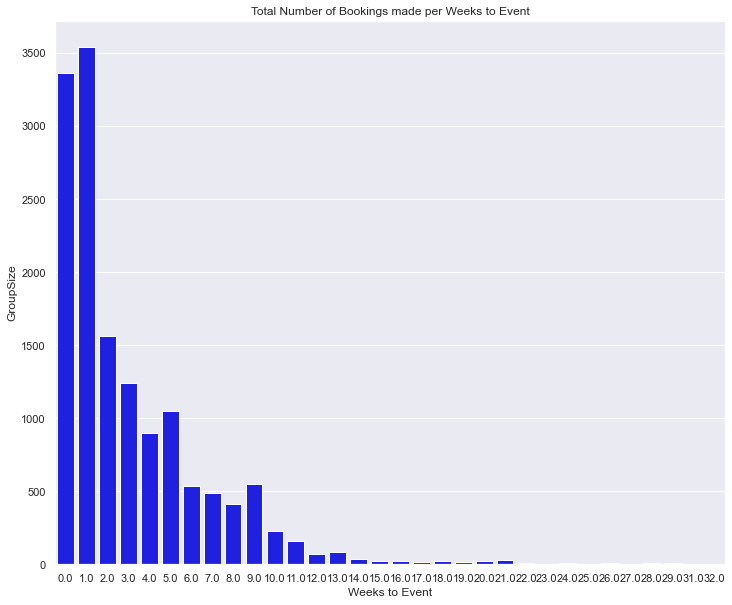

In [35]:
result27 = data.loc[data['Season'] == 'Summer'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'GroupSize',data= result27, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Total Number of Bookings made per Weeks to Event')

# Spring

### For BookingReference, what are the weeks to event for the number of bookings per season ?

In [36]:
data.loc[data['Season'] == 'Spring'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

,Weeks to Event,BookingReference
0,0.0,5563
1,1.0,4943
2,2.0,2383
3,3.0,1591
4,4.0,1419
5,5.0,831
6,6.0,605
7,7.0,617
8,8.0,429
9,9.0,480


Text(0.5, 1.0, 'Number of Bookings made per Weeks to Event')

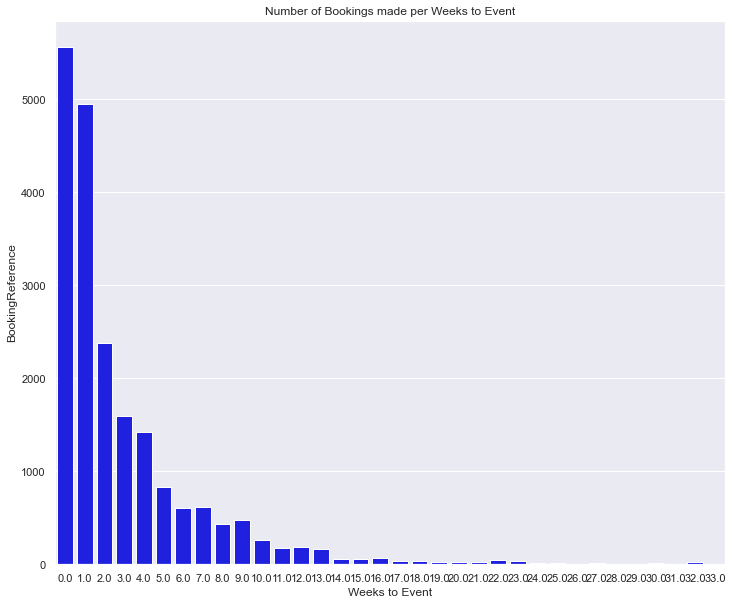

In [37]:
result28 = data.loc[data['Season'] == 'Spring'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'BookingReference',data= result28, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Weeks to Event')

### For GroupSize, what are the weeks to event for all total number of bookings per season ?

In [38]:
data.loc[data['Season'] == 'Spring'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

,Weeks to Event,GroupSize
0,0.0,5563
1,1.0,4943
2,2.0,2385
3,3.0,1591
4,4.0,1419
5,5.0,833
6,6.0,605
7,7.0,617
8,8.0,429
9,9.0,480


Text(0.5, 1.0, 'Total Number of Bookings made per Weeks to Event')

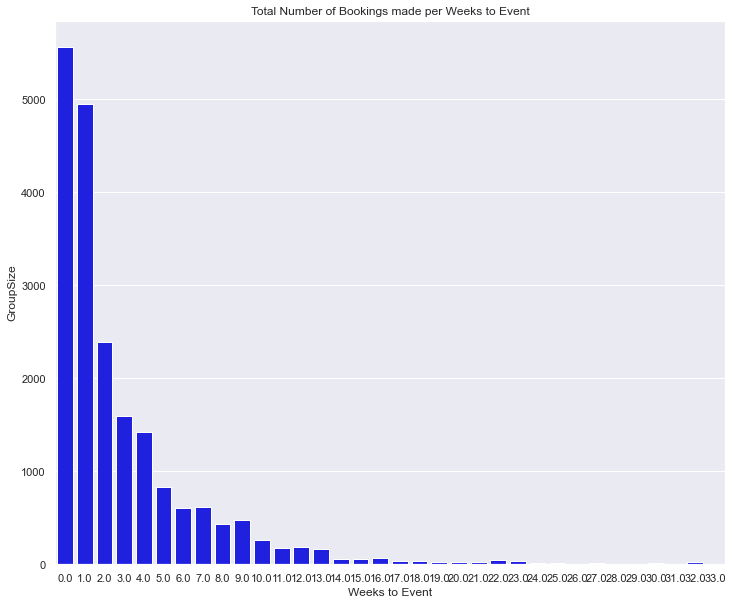

In [39]:
result29 = data.loc[data['Season'] == 'Spring'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'GroupSize',data= result29, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Total Number of Bookings made per Weeks to Event')

# Autumn

### For BookingReference, what are the weeks to event for the number of bookings per season ?

In [40]:
data.loc[data['Season'] == 'Autumn'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

,Weeks to Event,BookingReference
0,0.0,7131
1,1.0,6598
2,2.0,3340
3,3.0,2594
4,4.0,1972
5,5.0,1425
6,6.0,919
7,7.0,779
8,8.0,573
9,9.0,328


Text(0.5, 1.0, 'Number of Bookings made per  Weeks to Event')

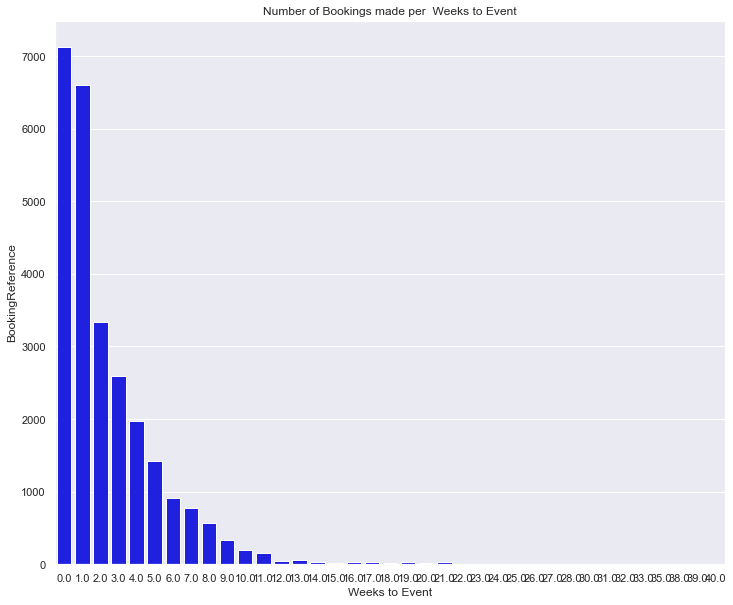

In [41]:
result210 = data.loc[data['Season'] == 'Autumn'].groupby(['Weeks to Event'], as_index=False).agg({'BookingReference': 'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'BookingReference',data= result210, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per  Weeks to Event')

### For GroupSize, what are the weeks to event for all total number of bookings per season ?

In [42]:
data.loc[data['Season'] == 'Spring'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

,Weeks to Event,GroupSize
0,0.0,5563
1,1.0,4943
2,2.0,2385
3,3.0,1591
4,4.0,1419
5,5.0,833
6,6.0,605
7,7.0,617
8,8.0,429
9,9.0,480


Text(0.5, 1.0, 'Total Number of Bookings made per Weeks to Event')

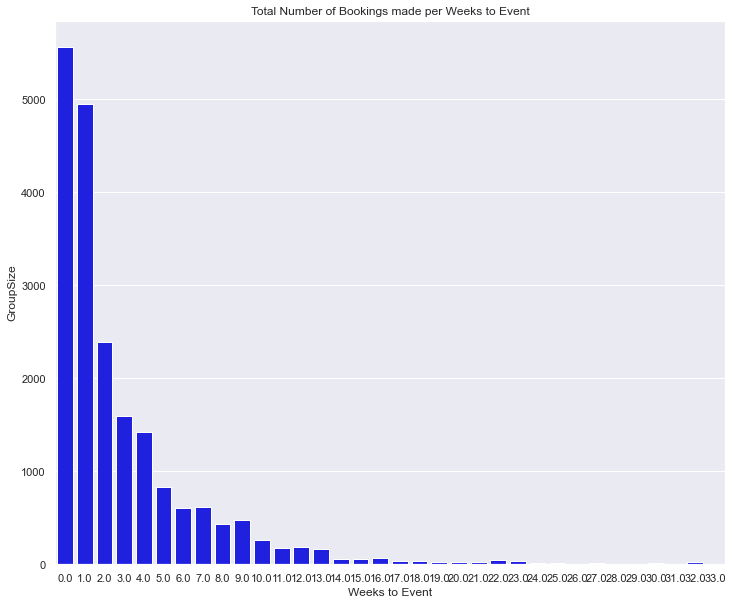

In [43]:
result211 = data.loc[data['Season'] == 'Spring'].groupby(['Weeks to Event'], as_index=False).agg({'GroupSize': 'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'Weeks to Event', y = 'GroupSize',data= result211, color='blue')
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Total Number of Bookings made per Weeks to Event')

## For categorized event types (non seasonality) against weeks to event

### For BookingReference, what are the average weeks to event for number of bookings made ?

In [49]:
data.groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

,EventType,Weeks to Event,BookingReference
0,Colloquium,2.041712,911
1,Conference / Symposium,3.849593,5525
2,Exhibition,1.160000,25
3,Lecture,2.202846,6956
4,Lunchtime Lecture,1.277228,202
5,Other Events,2.228532,5776
6,Reading Group,4.200000,125
7,Research Training,3.793944,9808
8,Seminar,2.389980,48105
9,Short Course,4.658789,677


In [62]:
data1 = data.groupby(['EventType','Weeks to Event','StartDate'], as_index=False).agg({'BookingReference':'count'})
data1.head(60)

,EventType,Weeks to Event,StartDate,BookingReference
0,Colloquium,0.0,2021-11-26 09:45:00,5
1,Colloquium,0.0,2022-01-27 17:30:00,19
2,Colloquium,0.0,2022-02-25 12:30:00,21
3,Colloquium,0.0,2022-03-21 12:30:00,115
4,Colloquium,0.0,2022-04-12 17:00:00,11
5,Colloquium,0.0,2022-05-10 17:30:00,2
6,Colloquium,0.0,2022-05-31 18:00:00,5
7,Colloquium,0.0,2022-06-07 15:00:00,51
8,Colloquium,0.0,2022-06-09 09:45:00,6
9,Colloquium,0.0,2022-06-13 17:30:00,13


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event')

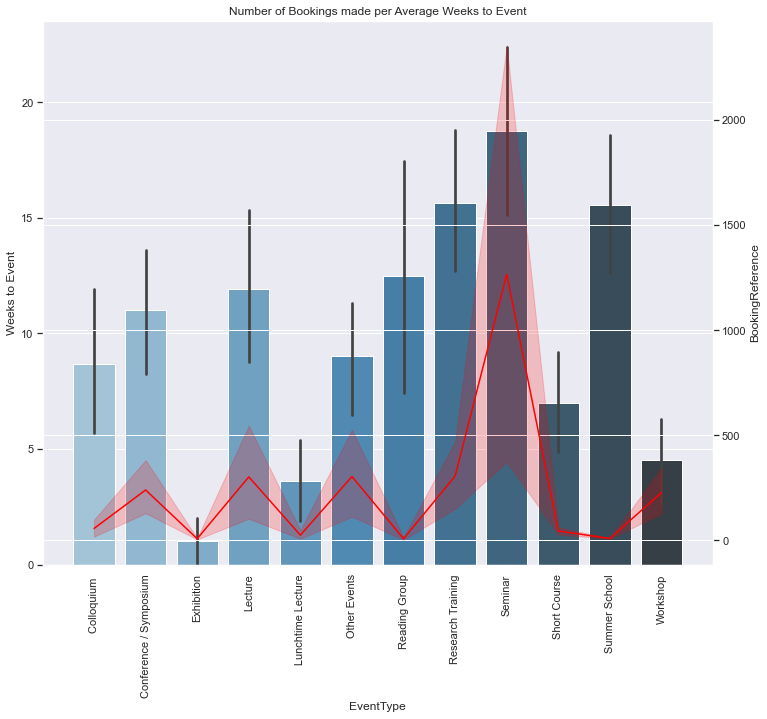

In [46]:
result3 = data.groupby(['EventType','Weeks to Event'], as_index=False).agg({'BookingReference':'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result3, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'BookingReference', data=result3, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event')

### For GroupSize, what are the weeks to event for total number of bookings made ?

In [199]:
data.groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

,EventType,Weeks to Event,GroupSize
0,Colloquium,2.041712,911
1,Conference / Symposium,3.849593,5527
2,Exhibition,1.160000,25
3,Lecture,2.202846,6960
4,Lunchtime Lecture,1.277228,202
5,Other Events,2.228532,5776
6,Reading Group,4.200000,125
7,Research Training,3.793944,9808
8,Seminar,2.389980,48105
9,Short Course,4.658789,677


Text(0.5, 1.0, 'Total Number of Bookings made per Average Weeks to Event')

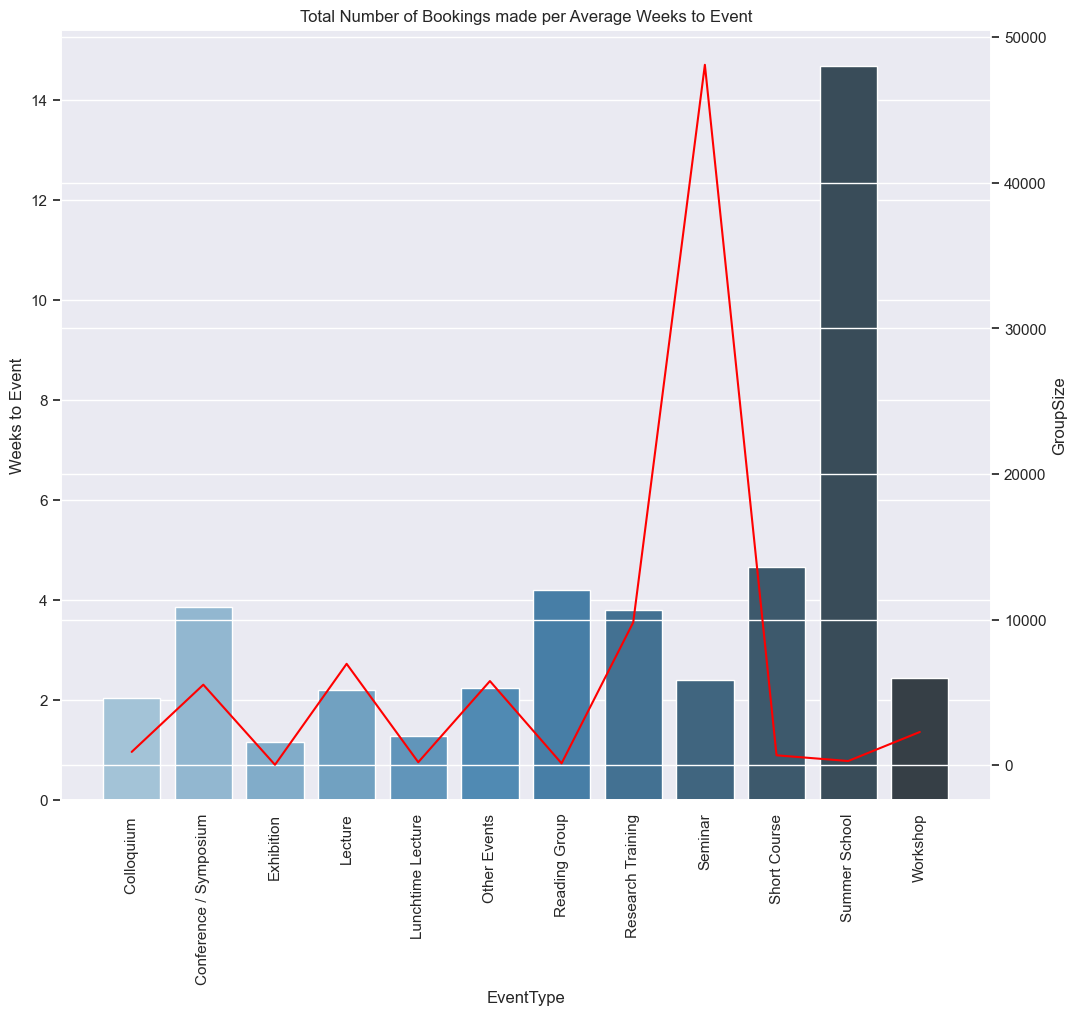

In [208]:
result31 = data.groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

# helper axis

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result31, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'GroupSize', data=result31, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Total Number of Bookings made per Average Weeks to Event')

## For categorized event types (seasonality) against weeks to event

# Winter

### For BookingReference, what are the average weeks to event for number of bookings made ?

In [179]:
data.loc[data['Season'] == 'Winter'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

,EventType,Weeks to Event,BookingReference
0,Colloquium,1.696296,405
1,Conference / Symposium,4.994069,843
2,Lecture,2.024026,1540
3,Lunchtime Lecture,1.354167,48
4,Other Events,2.224380,1493
5,Research Training,3.886379,3010
6,Seminar,2.090626,12215
7,Short Course,5.503650,137
8,Workshop,2.538462,65


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Winter')

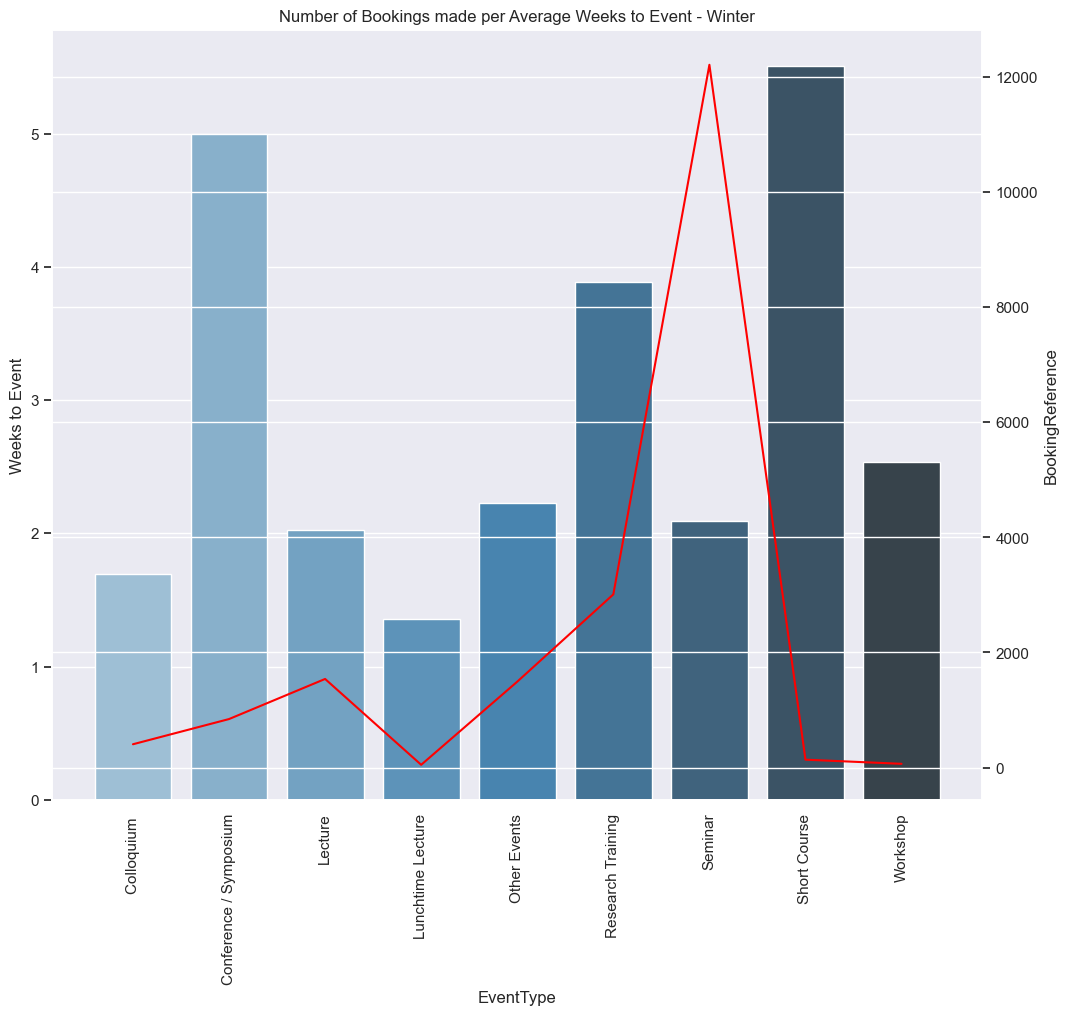

In [209]:
result32 = data.loc[data['Season'] == 'Winter'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result32, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'BookingReference', data=result32, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Winter')

### For GroupSize, what are the weeks to event for total number of bookings made ?

In [197]:
data.loc[data['Season'] == 'Winter'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

,EventType,Weeks to Event,GroupSize
0,Colloquium,1.696296,405
1,Conference / Symposium,4.994069,843
2,Lecture,2.024026,1540
3,Lunchtime Lecture,1.354167,48
4,Other Events,2.224380,1493
5,Research Training,3.886379,3010
6,Seminar,2.090626,12215
7,Short Course,5.503650,137
8,Workshop,2.538462,65


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Winter')

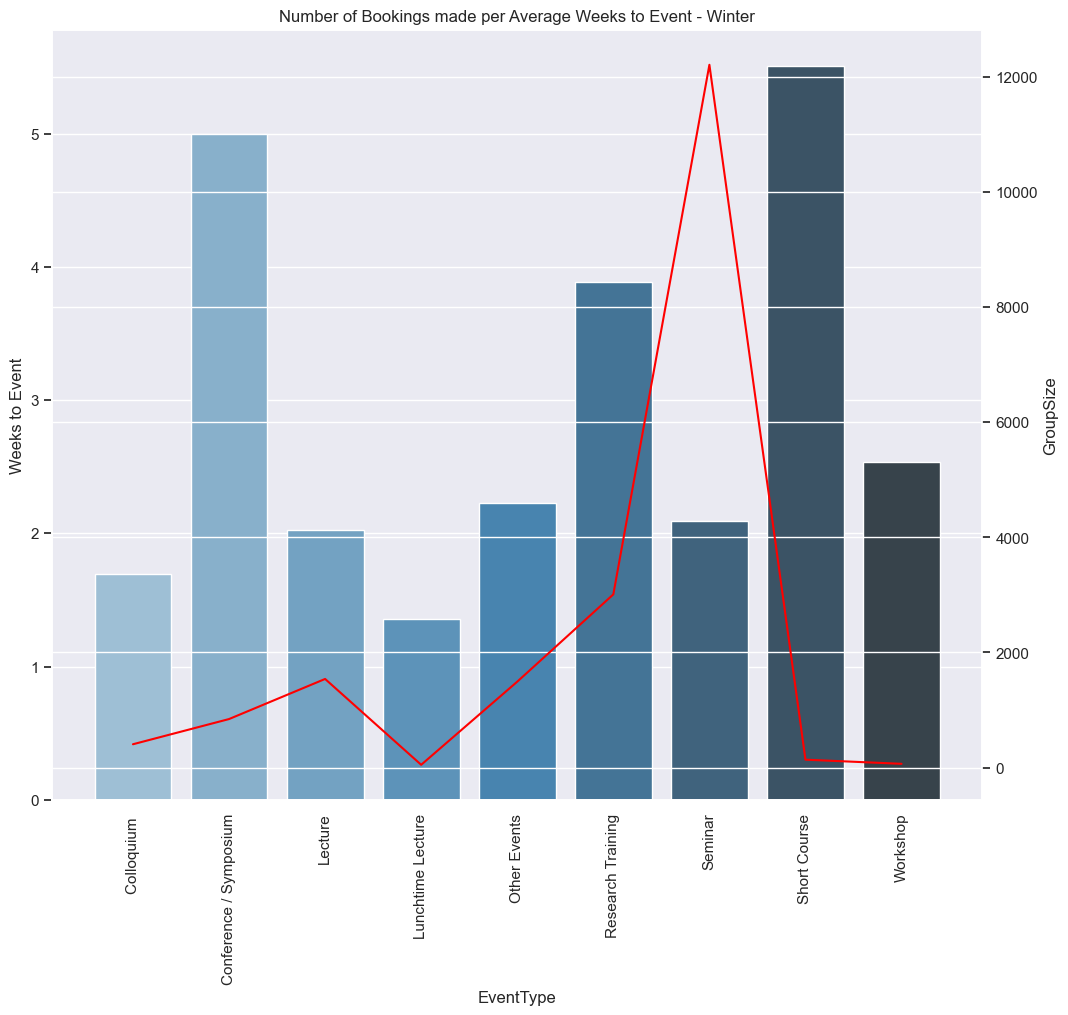

In [210]:
result33 = data.loc[data['Season'] == 'Winter'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result33, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'GroupSize', data=result33, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Winter')

# Summer

### For BookingReference, what are the average weeks to event for number of bookings made ?

In [182]:
data.loc[data['Season'] == 'Summer'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

,EventType,Weeks to Event,BookingReference
0,Colloquium,1.696296,405
1,Conference / Symposium,4.994069,843
2,Lecture,2.024026,1540
3,Lunchtime Lecture,1.354167,48
4,Other Events,2.224380,1493
5,Research Training,3.886379,3010
6,Seminar,2.090626,12215
7,Short Course,5.503650,137
8,Workshop,2.538462,65


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Summer')

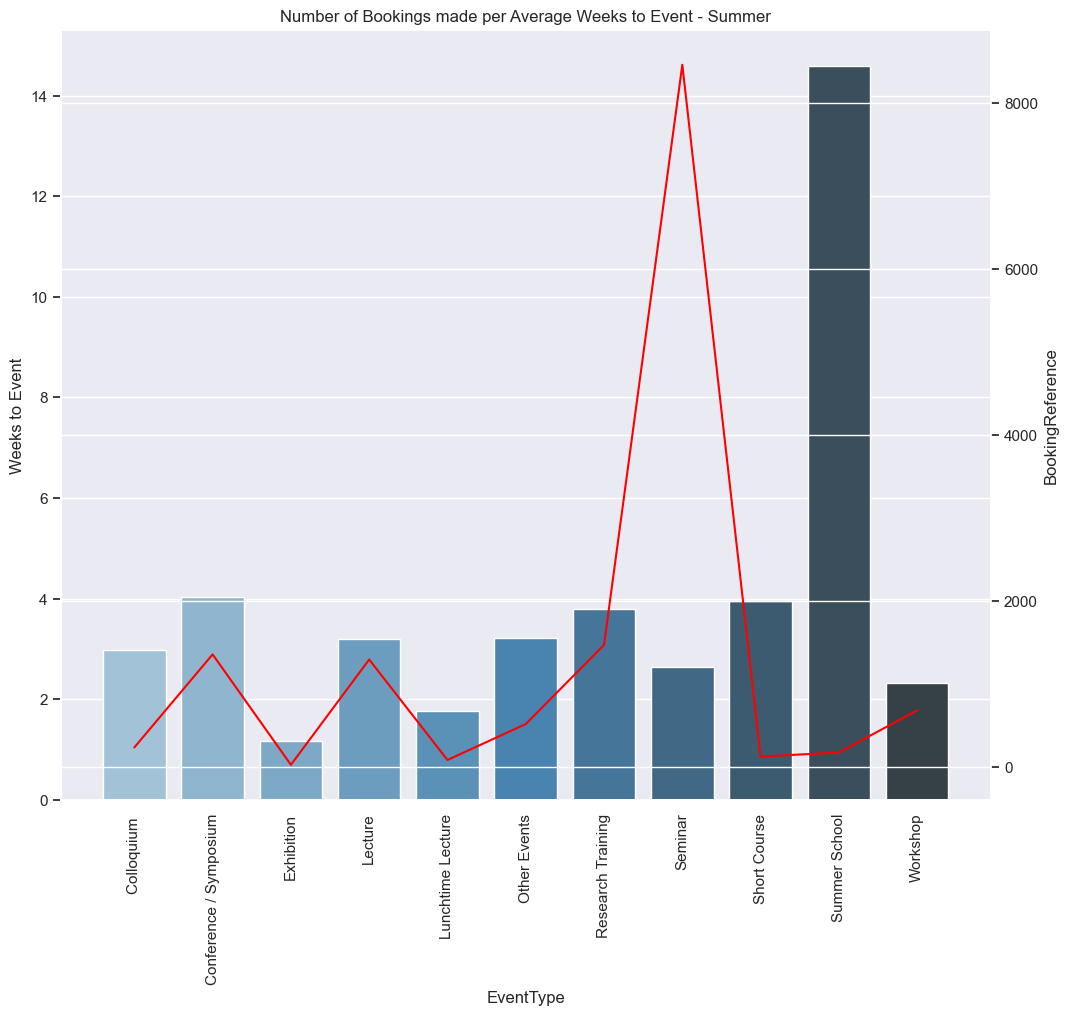

In [211]:
result34 = data.loc[data['Season'] == 'Summer'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result34, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'BookingReference', data=result34, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Summer')

### For GroupSize, what are the weeks to event for total number of bookings made ?

In [195]:
data.loc[data['Season'] == 'Summer'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

,EventType,Weeks to Event,GroupSize
0,Colloquium,2.987179,234
1,Conference / Symposium,4.039852,1355
2,Exhibition,1.160000,25
3,Lecture,3.202630,1293
4,Lunchtime Lecture,1.759036,83
5,Other Events,3.207364,516
6,Research Training,3.801906,1469
7,Seminar,2.637460,8457
8,Short Course,3.944000,125
9,Summer School,14.578035,173


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Summer')

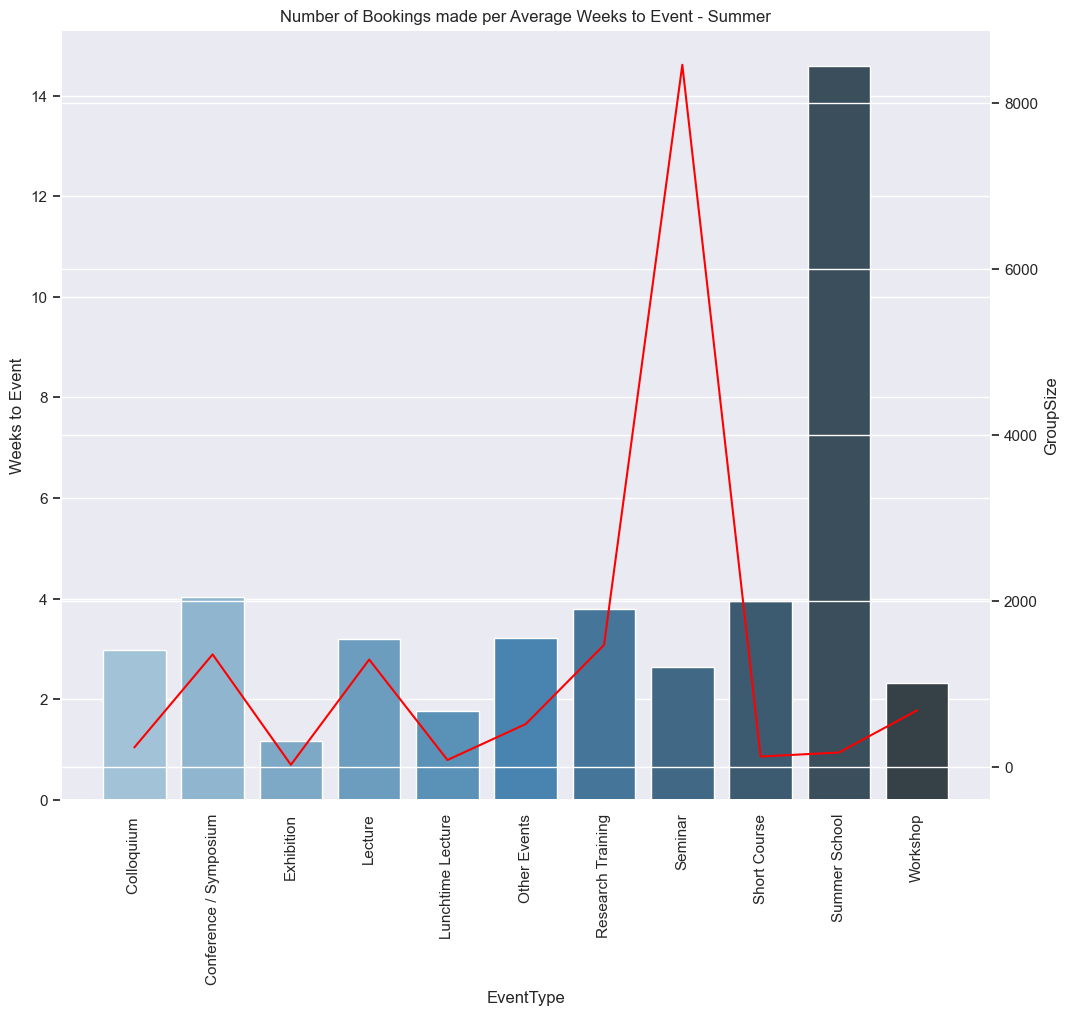

In [212]:
result35 = data.loc[data['Season'] == 'Summer'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result35, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'GroupSize', data=result35, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Summer')

# Spring

### For BookingReference, what are the average weeks to event for number of bookings made ?

In [192]:
data.loc[data['Season'] == 'Spring'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

,EventType,Weeks to Event,BookingReference
0,Colloquium,1.005917,169
1,Conference / Symposium,3.696950,1541
2,Lecture,2.064184,1262
3,Other Events,2.408864,1805
4,Reading Group,2.133333,30
5,Research Training,4.824903,2056
6,Seminar,2.705772,12300
7,Short Course,4.322807,285
8,Workshop,2.079137,695


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Spring')

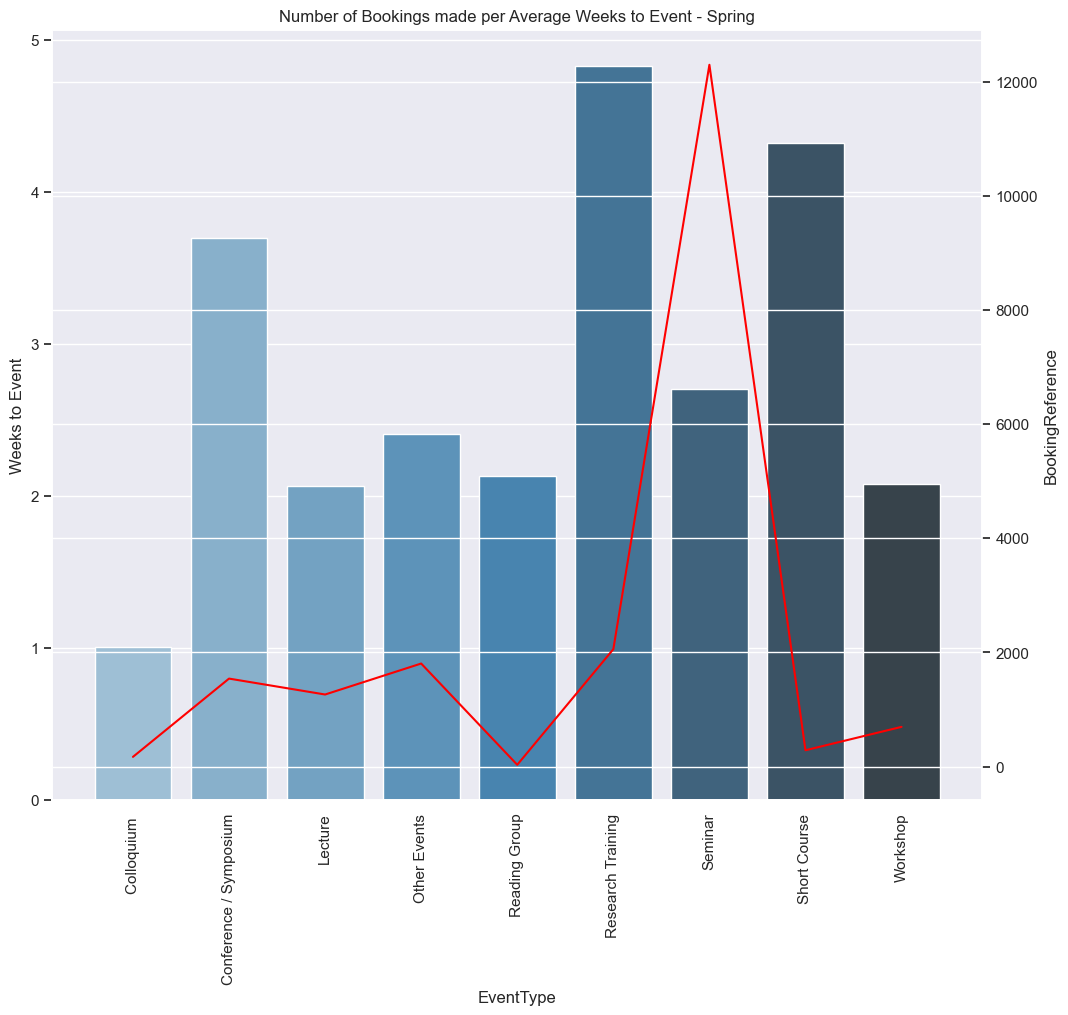

In [213]:
result36 = data.loc[data['Season'] == 'Spring'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result36, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'BookingReference', data=result36, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Spring')

### For GroupSize, what are the weeks to event for total number of bookings made ?

In [201]:
data.loc[data['Season'] == 'Spring'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

,EventType,Weeks to Event,GroupSize
0,Colloquium,1.005917,169
1,Conference / Symposium,3.696950,1543
2,Lecture,2.064184,1264
3,Other Events,2.408864,1805
4,Reading Group,2.133333,30
5,Research Training,4.824903,2056
6,Seminar,2.705772,12300
7,Short Course,4.322807,285
8,Workshop,2.079137,695


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Spring')

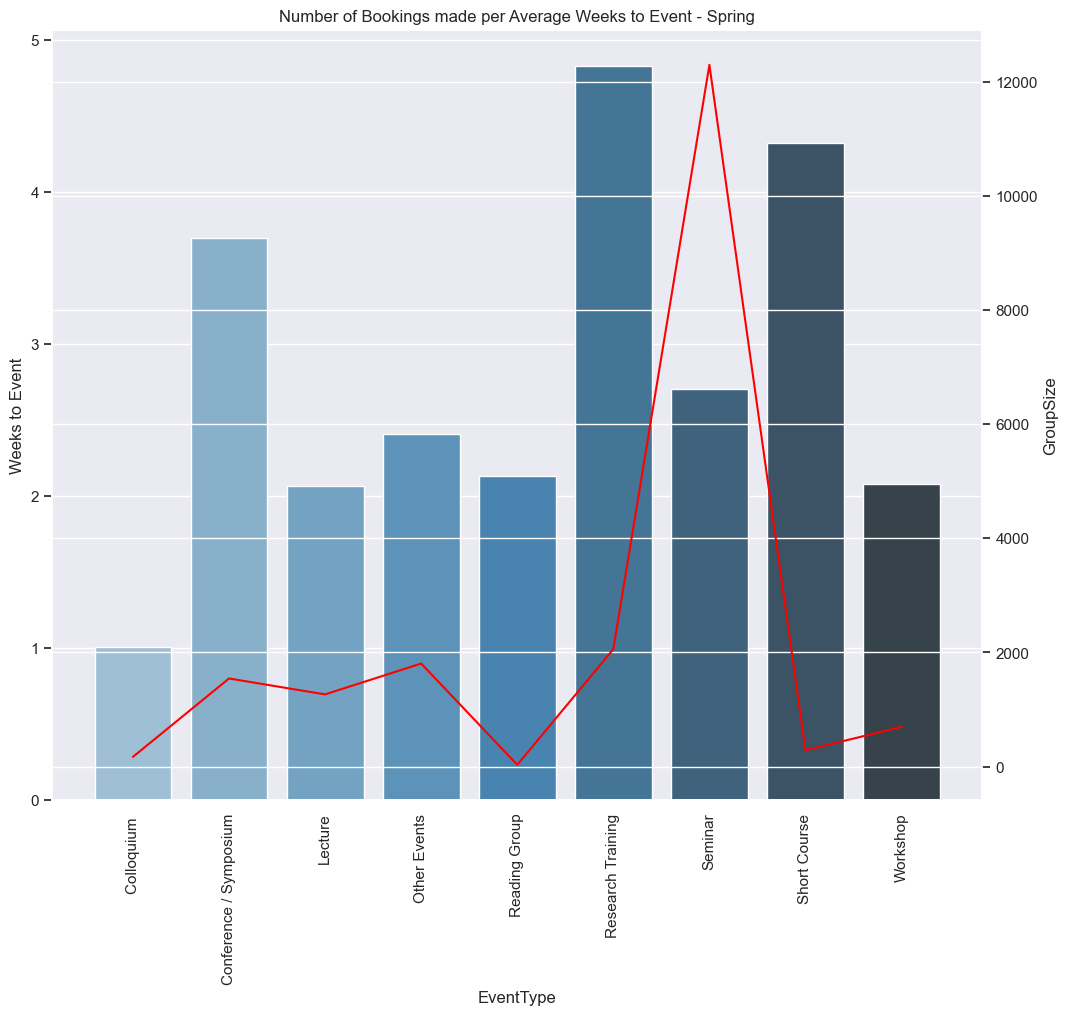

In [214]:
result37 = data.loc[data['Season'] == 'Spring'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result37, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'GroupSize', data=result37, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Spring')

# Autumn

### For BookingReference, what are the average weeks to event for number of bookings made ?

In [202]:
data.loc[data['Season'] == 'Autumn'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

,EventType,Weeks to Event,BookingReference
0,Colloquium,2.951456,103
1,Conference / Symposium,3.296753,1786
2,Lecture,1.908424,2861
3,Lunchtime Lecture,0.661972,71
4,Other Events,1.808359,1962
5,Reading Group,4.852632,95
6,Research Training,3.057745,3273
7,Seminar,2.236635,15133
8,Short Course,5.192308,130
9,Summer School,14.794643,112


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Autumn')

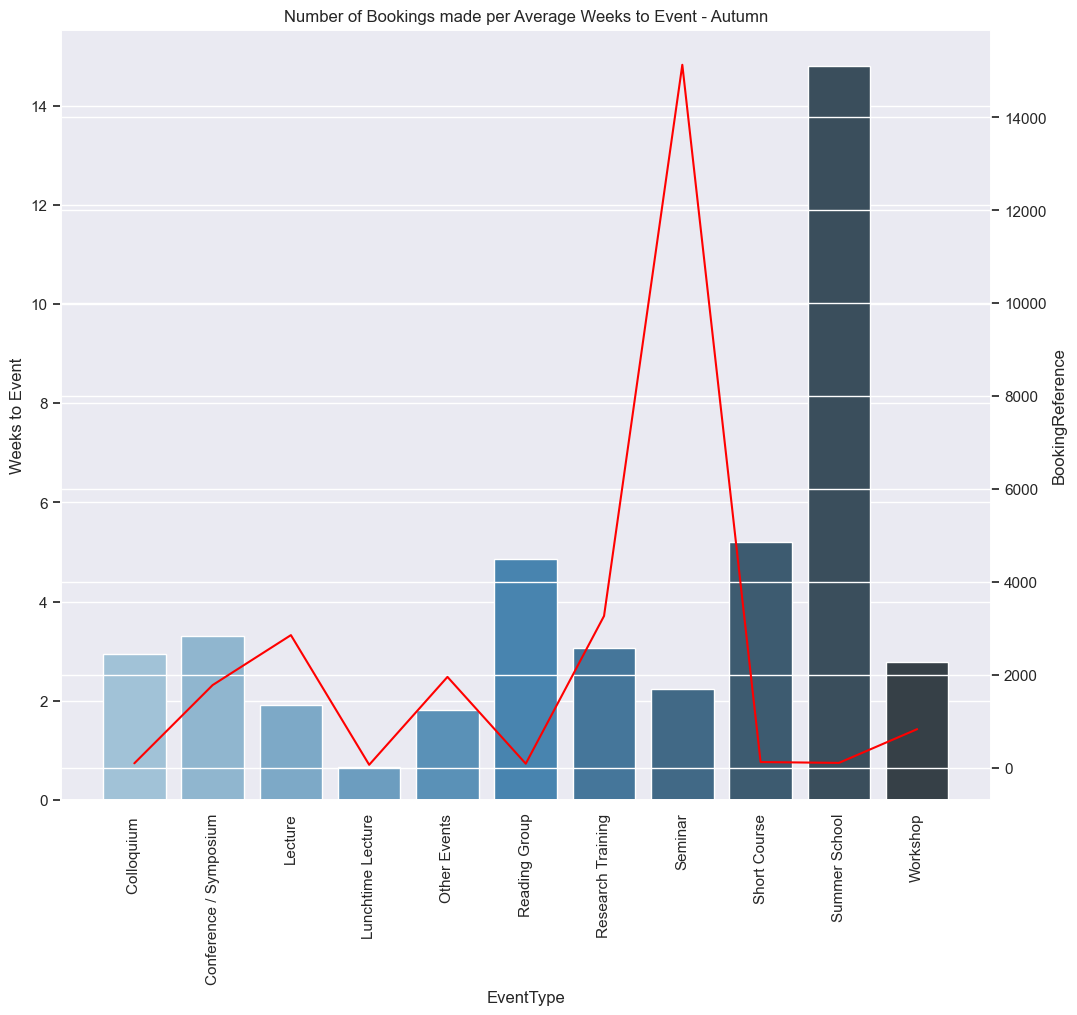

In [215]:
result38 = data.loc[data['Season'] == 'Autumn'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','BookingReference':'count'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result38, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'BookingReference', data=result38, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Autumn')

### For GroupSize, what are the weeks to event for total number of bookings made ?

In [204]:
data.loc[data['Season'] == 'Autumn'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

,EventType,Weeks to Event,GroupSize
0,Colloquium,2.951456,103
1,Conference / Symposium,3.296753,1786
2,Lecture,1.908424,2863
3,Lunchtime Lecture,0.661972,71
4,Other Events,1.808359,1962
5,Reading Group,4.852632,95
6,Research Training,3.057745,3273
7,Seminar,2.236635,15133
8,Short Course,5.192308,130
9,Summer School,14.794643,112


Text(0.5, 1.0, 'Number of Bookings made per Average Weeks to Event - Autumn')

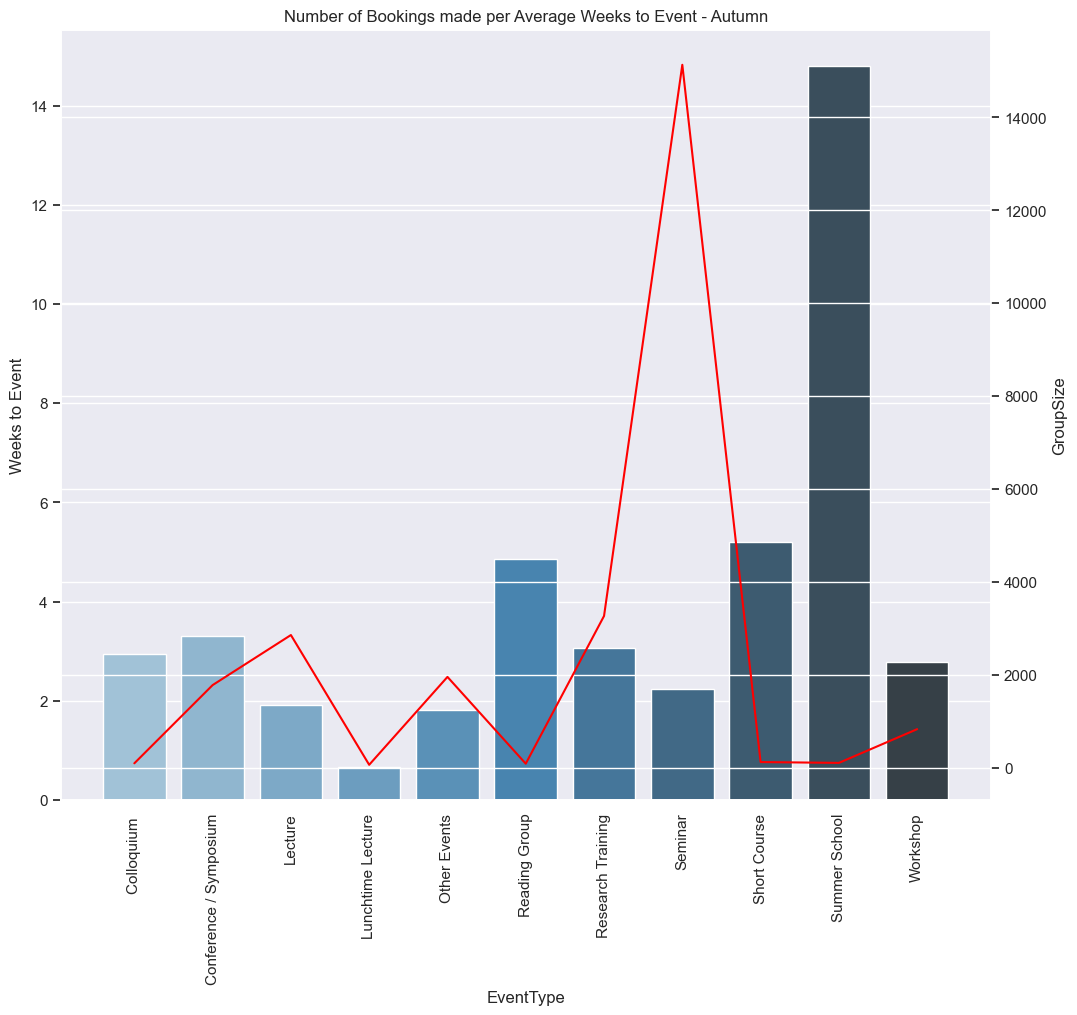

In [216]:
result39 = data.loc[data['Season'] == 'Autumn'].groupby(['EventType'], as_index=False).agg({'Weeks to Event':'mean','GroupSize':'sum'})

sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x = 'EventType', y = 'Weeks to Event',data= result39, palette="Blues_d")
ax2 =ax.twinx()
ax3 = sns.lineplot(x='EventType', y= 'GroupSize', data=result39, color='red', markers=True, ax=ax2)
ax.tick_params(axis='x', rotation=90)
# ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Bookings made per Average Weeks to Event - Autumn')

## Question 2 
What product sold the most? Why do you think it did?

In [ ]:
# # Plotting

# result2 = data.groupby(['EventType'], as_index=False).agg({'Days to Event':'mean','BookingReference':'count'})
# # days = [day for day,df in data.groupby('Days to Event')]

# plt.plot(result2.loc[:,['Days to Event','BookingReference']])
# plt.xticks(result2['Days to Event'])
# plt.xlabel('Number of days to Event')
# plt.ylabel('Number of Bookings')
# plt.grid()
# plt.show()

## Question 3
What time of the day should we display advertisements to maximize likelihood of customer’s buying product?